In [39]:
import math as math
import numpy as np


def RMSE(x, y, theta0, thetas):

    n = len(x)
    tCost = 0

    for i in range(n):
        yhat = np.dot(thetas, x[i,:]) + theta0
        tCost = tCost + (yhat - y.iloc[i])**2
    cost = math.sqrt(tCost / n)

    return cost

[0.13553332 0.12747905 0.06594231 0.07124659 0.11598269 0.03453796
 0.01677343 0.02301019 0.03218384 0.085106   0.11741324 0.07941521
 0.0115451  0.11015448 0.12689908]
0.4737434856504233


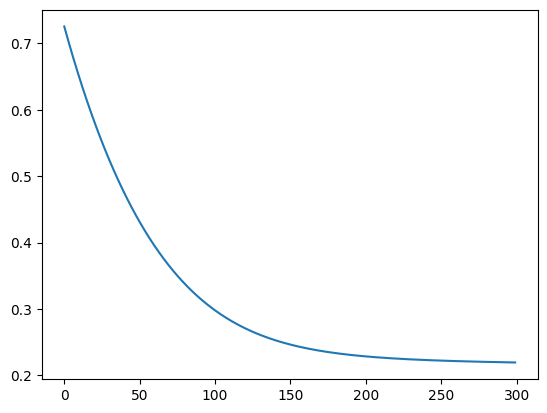

In [42]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


df = pd.read_csv('Assignment 1 Export.csv', header=0, sep=',', quotechar='"', usecols=['INTPTLAT',	'INTPTLON',	'Children',	'Elderly',	'Poverty',	'Elevation',	'SeaLevelRise',	'Precipitation',	'Diabetes',	'MentalHealth'	,'Asthma'	,'Disability'	,'HousingQuality',	'Homeless'	,'LivAlone'	,'FloodHealthIndex_Quintiles'])

#inputs and outputs
dataX = df.drop('FloodHealthIndex_Quintiles', axis=1)
dataY = df['FloodHealthIndex_Quintiles']
test = []
errs = []
numFeatures = 15

#hyperparameters
TrainPercent = 0.7   # set percentage of data used in the training set [0-1]
iter=300
eta=0.005

#data splitting
split = round(len(dataX)*TrainPercent)
trainX = dataX[:split].to_numpy()
trainY = dataY[:split]
testX = dataX[split+1:].to_numpy()
testY = dataY[split+1:]
N = split

#initialize parameters as 0
theta0=0
thetas=np.zeros(15)

#each iteration
for j in range(iter):
  t0Grad=0;
  tGrads=np.zeros(15)

  #for each row
  for i in range(N):
    yhat = np.dot(trainX[i,:],thetas) + theta0 #find parameters
    t0Grad= t0Grad+ (yhat-trainY[i])

    #for each feature
    for k in range(numFeatures):
      tGrads[k] += (yhat-trainY[i])*trainX[i,k]


  errs.append(RMSE(trainX, trainY, theta0, thetas))
  test.append(RMSE(testX, testY, theta0, thetas))


  t0Grad = t0Grad / N
  tGrads = tGrads / N
  theta0 = theta0 - eta * t0Grad
  thetas -= eta * tGrads


print(thetas)
print(test[len(test)-1])
plt.plot(errs)
plt.show()